In [1]:
import pandas as pd
import seaborn as sns


data = pd.read_csv("Titanic-Dataset.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Step 2: Split into target (y) and predictor (X) - Hasna Rahman
y = data["Survived"]
X = data.drop(["Survived"], axis=1)

print("Name: Hasna Rahman")
print("\nTarget variable (y):")
print(y.head())

print("\nPredictor variables (X):")
print(X.head())

Name: Hasna Rahman

Target variable (y):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Predictor variables (X):
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0       

In [3]:
# Step 3: keep numeric columns and handle missing values
X_numeric = X.select_dtypes(include=["int64", "float64"]).copy()

# fill missing numeric values with the median of each column
X_numeric = X_numeric.fillna(X_numeric.median())

print("Name: Hasna Rahman - missing values handled")
print(X_numeric.isnull().sum())

Name: Hasna Rahman - missing values handled
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [4]:
# Clean the data before training
import numpy as np

# Replace missing values (NaN) with the column mean for numeric data
X_numeric = np.nan_to_num(X_numeric)

In [5]:
# Step 3: Normalize our data
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

print("Name: Hasna Rahman")
print(X_scaled[:5])  # show first 5 scaled rows

Name: Hasna Rahman
[[-1.73010796  0.82737724 -0.56573646  0.43279337 -0.47367361 -0.50244517]
 [-1.72622007 -1.56610693  0.66386103  0.43279337 -0.47367361  0.78684529]
 [-1.72233219  0.82737724 -0.25833709 -0.4745452  -0.47367361 -0.48885426]
 [-1.71844431 -1.56610693  0.4333115   0.43279337 -0.47367361  0.42073024]
 [-1.71455642  0.82737724  0.4333115  -0.4745452  -0.47367361 -0.48633742]]


In [6]:
# Step 4: Split our data into training and testing sets - Hasna Rahman
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=22)

In [7]:
# Step 5: Train the model - Hasna Rahman
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [8]:
print("Name: Hasna Rahman")
y_pred

Name: Hasna Rahman


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1])

In [9]:
print("Name: Hasna Rahman")
y_test

Name: Hasna Rahman


816    0
789    0
869    1
235    0
473    1
      ..
475    0
678    0
35     0
208    1
88     1
Name: Survived, Length: 268, dtype: int64

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Name: Hasna Rahman")
print(accuracy)

Name: Hasna Rahman
0.7238805970149254


In [12]:
import pandas as pd
import seaborn as sns

In [13]:
data = pd.read_csv("Titanic-Dataset.csv")

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

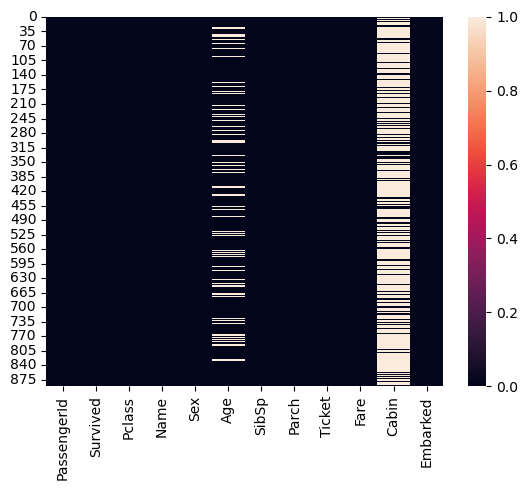

In [15]:
sns.heatmap(data.isnull())

In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop(columns=['Cabin'], inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [19]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
data = data.drop(columns=['Name', 'Ticket'])
data['Sex'] = [1 if sex == 'male' else 0 for sex in data['Sex']]
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [23]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [25]:
# split into target and predictor
y = data["Survived"]
X = data.drop(["Survived"], axis=1)

In [26]:
print("Name: Hasna Rahman")
print("\nTarget variable (y):")
print(y.head())

print("\nPredictor variables (X):")
print(X.head())

Name: Hasna Rahman

Target variable (y):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Predictor variables (X):
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1       3    1  22.0      1      0   7.2500         0
1            2       1    0  38.0      1      0  71.2833         1
2            3       3    0  26.0      0      0   7.9250         0
3            4       1    0  35.0      1      0  53.1000         0
4            5       3    1  35.0      0      0   8.0500         0


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7238805970149254


In [29]:
from sklearn.pipeline import Pipeline

In [30]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000, solver="liblinear"))
])

In [31]:
param_grid = {
    "lr__C": [0.01, 0.1, 1, 10, 100],
    "lr__penalty": ["l1", "l2"]
}

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [35]:
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

Best params: {'lr__C': 0.1, 'lr__penalty': 'l1'}


In [37]:
from sklearn.metrics import classification_report
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Test accuracy: 0.7238805970149254
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       164
           1       0.71      0.49      0.58       104

    accuracy                           0.72       268
   macro avg       0.72      0.68      0.69       268
weighted avg       0.72      0.72      0.71       268



In [38]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[143,  21],
       [ 53,  51]])

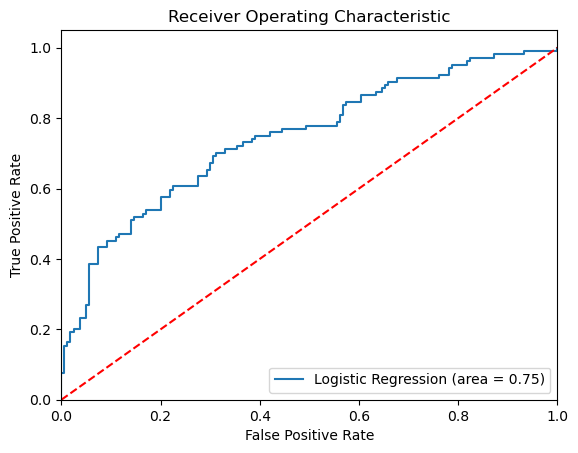

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# use predicted probabilities for the positive class
y_score = lr.predict_proba(X_test)[:, 1]

logit_roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [41]:
probs = lr.predict_proba(X_test)[:, 1]
print(probs[:20])

[0.23795203 0.5298542  0.39008155 0.24707434 0.48324618 0.26151457
 0.6474281  0.24042687 0.10426009 0.78672669 0.30377221 0.24986631
 0.19280165 0.28591607 0.0803896  0.32549759 0.25284203 0.6220836
 0.63096438 0.4324978 ]
